In [1]:
!pip install powerlaw

In [2]:
import powerlaw

In [3]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from FT import *

In [4]:
path = "/cxnfs/Mark/Data/cleaned_data/"

interp_dict_pm10 = {n: pd.read_csv(path + 'pm10_interpolated/'+'pm10_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}
interp_dict_pm25 = {n: pd.read_csv(path + 'pm25_interpolated/'+'pm25_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}
interp_dict_pm1 = {n: pd.read_csv(path + 'pm1_interpolated/'+ 'pm1_interp_seg_'+ str(n)+'.csv',index_col = 0, parse_dates = True) for n in range(24)}

pm10_subset = interp_dict_pm10[17]
pm25_subset = interp_dict_pm25[17]
pm1_subset = interp_dict_pm1[17]
pm10_prepandemic = pm10_subset[:'2020-03-09']
pm25_prepandemic = pm25_subset[:'2020-03-09']
pm1_prepandemic = pm1_subset[:'2020-03-09']
pm10_ecq = pm10_subset['2020-03-17':]
pm25_ecq = pm25_subset['2020-03-17':]
pm1_ecq = pm1_subset['2020-03-17':]

pm10_freq_dom = normed_FT(pm10_subset)
pm25_freq_dom = normed_FT(pm25_subset)
pm1_freq_dom = normed_FT(pm1_subset)

pm10_prepandemic_spec = normed_FT(pm10_prepandemic)
pm25_prepandemic_spec = normed_FT(pm25_prepandemic) 
pm1_prepandemic_spec = normed_FT(pm1_prepandemic) 
pm10_ecq_spec = normed_FT(pm10_ecq) 
pm25_ecq_spec =  normed_FT(pm25_ecq) 
pm1_ecq_spec = normed_FT(pm1_ecq)

In [5]:
pm1_prepandemic_result = powerlaw.Fit(data = pm1_prepandemic_spec.abs_fourier_coeff_square[1:], xmin = pm1_prepandemic_spec.freq[1:].min())
pm1_ecq_result = powerlaw.Fit(data = pm1_ecq_spec.abs_fourier_coeff_square[1:], xmin = pm1_ecq_spec.freq[1:].min())

pm25_prepandemic_result = powerlaw.Fit(data = pm25_prepandemic_spec.abs_fourier_coeff_square[1:], xmin = pm25_prepandemic_spec.freq[1:].min())
pm25_ecq_result = powerlaw.Fit(data = pm25_ecq_spec.abs_fourier_coeff_square[1:], xmin = pm25_ecq_spec.freq[1:].min())


pm10_ecq_result = powerlaw.Fit(data = pm10_ecq_spec.abs_fourier_coeff_square[1:], xmin = pm10_ecq_spec.freq[1:].min())
pm10_prepandemic_result = powerlaw.Fit(data = pm10_prepandemic_spec.abs_fourier_coeff_square[1:], xmin = pm10_prepandemic_spec.freq[1:].min())

In [6]:
alpha_df = pd.DataFrame()
alpha_df['PreECQ'] = [pm1_prepandemic_result.alpha,pm25_prepandemic_result.alpha,pm10_prepandemic_result.alpha]
alpha_df['ECQ'] = [pm1_ecq_result.alpha,pm25_ecq_result.alpha,pm10_ecq_result.alpha]


In [7]:
alpha_df

,PreECQ,ECQ
0,1.612435,1.620624
1,1.631931,1.803780
2,2.454207,2.515121


In [8]:
alpha_df.style.to_latex()

'\\begin{tabular}{lrr}\n & PreECQ & ECQ \\\\\n0 & 1.612435 & 1.620624 \\\\\n1 & 1.631931 & 1.803780 \\\\\n2 & 2.454207 & 2.515121 \\\\\n\\end{tabular}\n'

# $PM_1$

Text(0.5, 1.0, 'Pre-ECQ')

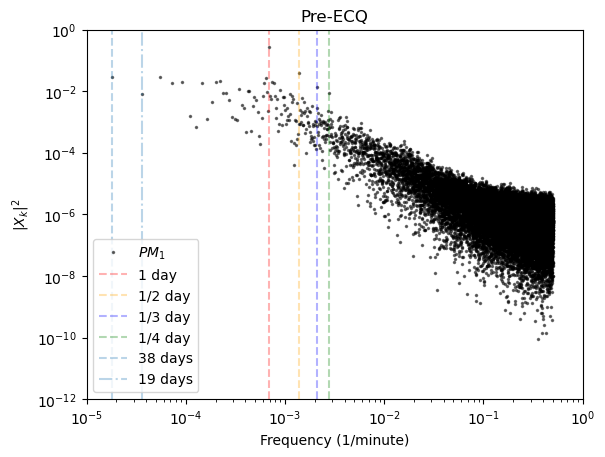

In [24]:
fig, ax = plt.subplots()
ax.loglog(pm1_prepandemic_spec.freq, pm1_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{1}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day', color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day', color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '38 days')
ax.axvline(pm1_prepandemic_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '19 days')
ax.legend(loc = 'lower left')
plt.title('Pre-ECQ')


Text(0.5, 1.0, 'ECQ')

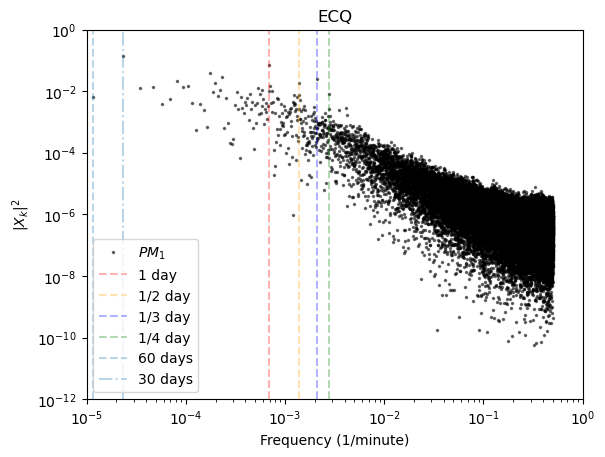

In [17]:
fig, ax = plt.subplots()
ax.loglog(pm1_ecq_spec.freq, pm1_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{1}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)

ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day',color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day', color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day',color = 'green')
ax.axvline(pm1_ecq_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '60 days')
ax.axvline(pm1_ecq_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '30 days')
ax.legend(loc = 'lower left')
plt.title('ECQ')


In [ ]:
fig, ax = plt.subplots()
ax.loglog(pm1_prepandemic_spec.freq, pm1_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{1}$',markersize=3, alpha=0.5)
# ax.set_xlim(-0.00005, 0.001)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')
# ax.vlines(1/(pm10_freq_dom.sort_values('abs_fourier_coeff_square', ascending= False).iloc[0,-1] *24*60)
#           , 0, 0.15, linestyle = 'dotted', label = '104 days', color = 'gray')
# ax.vlines(1/(1*7*24*60), 0, 0.15, linestyle = 'dashed', label = '1 wk', color = 'gray')
# ax.vlines(np.log10(1/(1*24*60)), 0, 0.28, linestyle = 'dashdot', label = '1 day', color = 'gray')
# ax.xaxis.set_major_locator(MultipleLocator(0.0001))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(2))
# ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.legend()
ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-12, 1e0)
ax.axvline(1/(60*24), alpha = 0.2, color = 'red')
ax.axvline(1/(0.5*60*24),alpha = 0.2)
ax.axvline(1/(0.25*60*24),alpha = 0.2)
ax.axvline(1/(0.99*60*24),alpha = 0.2)
ax.axvline(1/(60*24/3),alpha = 0.2)
ax.axvline(1/(30*60*24),alpha = 0.2)
x = np.logspace(-5, 0)
# ax.loglog(x, 1/x * (6e-6))
ax.loglog(x, 1/x * (6e-6), label = '1/f')
# ax.loglog(x, (x**(-1.61)) * (6e-8), label = '1.61')
plt.title('Pre-ECQ')
plt.legend()

In [ ]:
result = powerlaw.Fit(data = pm1_ecq_spec.abs_fourier_coeff_square[1:])
print(result.alpha)

In [ ]:
fig, ax = plt.subplots()
ax.loglog(pm1_ecq_spec.freq, pm1_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{1}$',markersize=3, alpha=0.5)
# ax.set_xlim(-0.00005, 0.001)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')
# ax.vlines(1/(pm10_freq_dom.sort_values('abs_fourier_coeff_square', ascending= False).iloc[0,-1] *24*60)
#           , 0, 0.15, linestyle = 'dotted', label = '104 days', color = 'gray')
# ax.vlines(1/(1*7*24*60), 0, 0.15, linestyle = 'dashed', label = '1 wk', color = 'gray')
# ax.vlines(np.log10(1/(1*24*60)), 0, 0.28, linestyle = 'dashdot', label = '1 day', color = 'gray')
# ax.xaxis.set_major_locator(MultipleLocator(0.0001))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(2))
# ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.legend()
ax.set_ylim(1e-12, 1e1)
ax.axvline(1/(60*24), alpha = 0.2, color = 'red')
ax.axvline(1/(0.5*60*24),alpha = 0.2)
ax.axvline(1/(0.25*60*24),alpha = 0.2)
ax.axvline(1/(0.99*60*24),alpha = 0.2)
ax.axvline(1/(60*24/3),alpha = 0.2)
ax.axvline(1/(30*60*24),alpha = 0.2)
x = np.logspace(-5, 0)
ax.loglog(x, 1/x * (6e-6))
plt.title('ECQ')

In [ ]:
m,b = np.polyfit(pm1_prepandemic_spec.freq.apply(lambda x: np.log10(x))[1:], pm1_prepandemic_spec.abs_fourier_coeff_square.apply(lambda x: np.log10(x))[1:], 1)

In [ ]:
np.log10(pm1_prepandemic_spec.abs_fourier_coeff_square[1:].max())

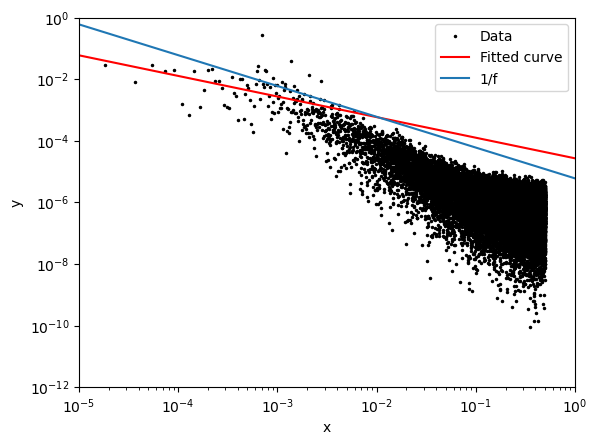

Fitted parameters:
a = 2.6885942754544614e-05
b = 0.6687086595350139


In [10]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the power law function
def power_law(x, a, b):
    return a * (x ** (-b))

# Perform the curve fitting
params, cov = curve_fit(power_law, pm1_prepandemic_spec.freq[1:], pm1_prepandemic_spec.abs_fourier_coeff_square[1:])

# Retrieve the fitted parameters
a_fit, b_fit = params

# Generate fitted curve
x_fit = np.linspace(1e-5, 1, 100)
y_fit = power_law(x_fit, a_fit, b_fit)

# Plot the data and fitted curve
plt.loglog(pm1_prepandemic_spec.freq[1:], pm1_prepandemic_spec.abs_fourier_coeff_square[1:],'k.', label='Data', markersize = 3)
plt.loglog(x_fit, y_fit, 'r-', label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(1e-12, 1e0)
plt.xlim(1e-5, 1e-0)
x = np.logspace(-5, 0)
plt.loglog(x, 1/x * (6e-6), label = '1/f')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters:")
print("a =", a_fit)
print("b =", b_fit)


# $PM_{2.5}$

Text(0.5, 1.0, 'Pre-ECQ')

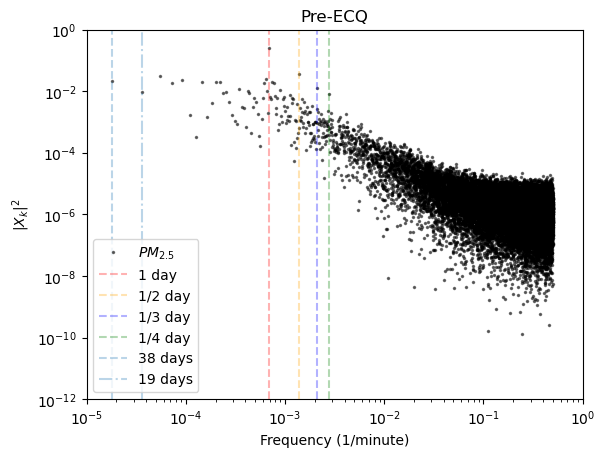

In [20]:
fig, ax = plt.subplots()
ax.loglog(pm25_prepandemic_spec.freq, pm25_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{2.5}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day', color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day', color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm25_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '38 days')
ax.axvline(pm25_prepandemic_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '19 days')
ax.legend(loc = 'lower left')
plt.title('Pre-ECQ')


Text(0.5, 1.0, 'ECQ')

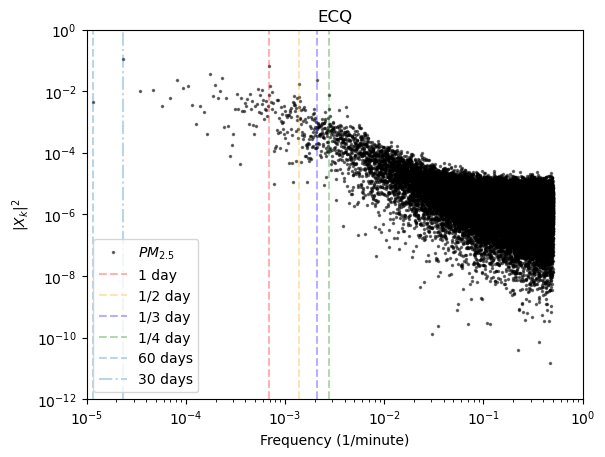

In [21]:
fig, ax = plt.subplots()
ax.loglog(pm25_ecq_spec.freq, pm25_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{2.5}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day',color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day',color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm25_ecq_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '60 days')
ax.axvline(pm25_ecq_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '30 days')
ax.legend(loc = 'lower left')
plt.title('ECQ')


# $PM_{10}$

Text(0.5, 1.0, 'Pre-ECQ')

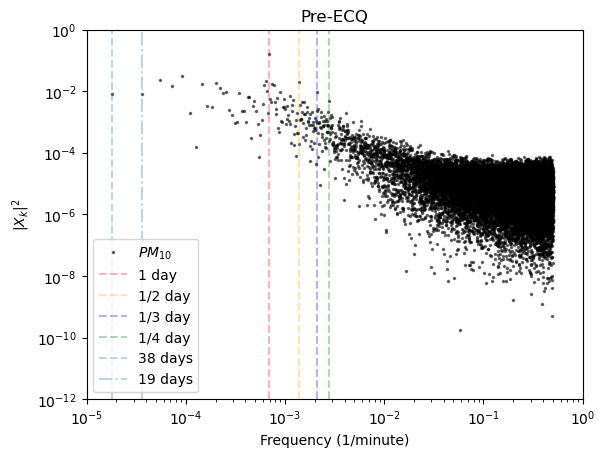

In [22]:
fig, ax = plt.subplots()
ax.loglog(pm10_prepandemic_spec.freq, pm10_prepandemic_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{10}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day', color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day', color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm10_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '38 days')
ax.axvline(pm10_prepandemic_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '19 days')
ax.legend(loc = 'lower left')
plt.title('Pre-ECQ')


Text(0.5, 1.0, 'ECQ')

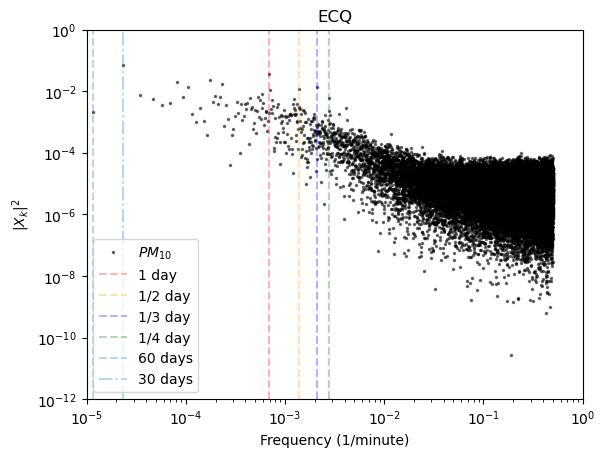

In [23]:
fig, ax = plt.subplots()
ax.loglog(pm10_ecq_spec.freq, pm10_ecq_spec.abs_fourier_coeff_square, 'k.', label = '$PM_{10}$',markersize=3, alpha=0.5)
ax.set_xlabel('Frequency (1/minute)')
ax.set_ylabel('$|X_k|^2$')

ax.set_ylim(1e-12, 1e0)
ax.set_xlim(1e-5, 1e0)
# ax.set_xlim(1e-12, 1e1)
x = np.logspace(-5, 0)
# ax.loglog(x, (x**(-1.61))*0.5e-6)
# ax.axvline(pm1_prepandemic_spec.freq[1:].min(), alpha = 0.3, linestyle = '--')
ax.axvline(1/(60*24), alpha = 0.3, linestyle = '--', label = '1 day', color = 'red')
ax.axvline(1/(0.5*60*24), alpha = 0.3, linestyle = '--',label = '1/2 day',color = 'orange')
ax.axvline(1/(60*24/3), alpha = 0.3, linestyle = '--',label = '1/3 day',color = 'blue')
ax.axvline(1/(60*24/4), alpha = 0.3, linestyle = '--',label = '1/4 day', color = 'green')
ax.axvline(pm25_ecq_spec.freq[1:].min(), alpha = 0.3, linestyle = '--', label = '60 days')
ax.axvline(pm25_ecq_spec.freq[1:].min()*2, alpha = 0.3, linestyle = '-.', label = '30 days')
ax.legend(loc = 'lower left')
plt.title('ECQ')
